In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.5'

In [2]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers 
import tensorflow.keras.optimizers as optimizers

from keras.datasets import cifar10
from keras.utils import to_categorical

import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

train_images = train_images[:40000]
train_labels = train_labels[:40000]

# CHECKER:

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

170500096/170498071 [==============================] - 6s 0us/step
Training set: images (40000, 32, 32, 3)	labels: (40000, 1)
validation set: images (10000, 32, 32, 3)	labels: (10000, 1)
Test set: images (10000, 32, 32, 3)	labels: (10000, 1)


In [5]:
train_images = train_images.reshape((40000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = validation_images.reshape((10000, 32, 32, 3))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)


print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 10)
validation set: images (10000, 32, 32, 3)	labels: (10000, 10)
Test set: images (10000, 32, 32, 3)	labels: (10000, 10)


In [6]:
from tensorflow.keras.applications import VGG19 

conv_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

conv_base.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
80142336/80134624 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128

In [7]:
def extract_features(input_data):
    return conv_base.predict(input_data) 

train_features = extract_features(train_images)
validation_features = extract_features(validation_images)
test_features = extract_features(test_images)

print("train features:", train_features.shape)
print("validation features:", validation_features.shape)
print("test features:", test_features.shape)

train features: (40000, 1, 1, 512)
validation features: (10000, 1, 1, 512)
test features: (10000, 1, 1, 512)


In [8]:
train_features = np.reshape(train_features, (len(train_labels) , 512))
validation_features = np.reshape(validation_features, (len(validation_labels),512))
test_features = np.reshape(test_features, (len(test_labels), 512))

print("train features:", train_features.shape)
print("validation features:", validation_features.shape)
print("test features:", test_features.shape)

train features: (40000, 512)
validation features: (10000, 512)
test features: (10000, 512)


In [9]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_dim= 512))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='categorical_crossentropy',
                  metrics=['accuracy'])


model_hist = model.fit(train_features, train_labels,
                    epochs=500,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/200
40000/40000 [==============================] - 0s 12us/sample - loss: 2.4690 - acc: 0.1032 - val_loss: 2.3020 - val_acc: 0.1171
Epoch 2/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.3472 - acc: 0.1012 - val_loss: 2.3011 - val_acc: 0.1167
Epoch 3/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.3216 - acc: 0.1040 - val_loss: 2.3013 - val_acc: 0.0955
Epoch 4/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.3119 - acc: 0.1033 - val_loss: 2.3013 - val_acc: 0.0878
Epoch 5/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.3082 - acc: 0.1059 - val_loss: 2.3010 - val_acc: 0.0877
Epoch 6/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.3030 - acc: 0.1099 - val_loss: 2.3001 - val_acc: 0.1015
Epoch 7/200
40000/40000 [==============================] - 0s 6us/sample - loss: 2.2991 - acc: 0.1149 - val_loss: 2

In [16]:
model_hist = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))



Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9572 - acc: 0.6640 - val_loss: 1.5403 - val_acc: 0.5604
Epoch 2/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9533 - acc: 0.6656 - val_loss: 1.5452 - val_acc: 0.5592
Epoch 3/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9615 - acc: 0.6663 - val_loss: 1.5337 - val_acc: 0.5592
Epoch 4/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9562 - acc: 0.6665 - val_loss: 1.5369 - val_acc: 0.5622
Epoch 5/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9589 - acc: 0.6665 - val_loss: 1.5239 - val_acc: 0.5614
Epoch 6/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9457 - acc: 0.6689 - val_loss: 1.5459 - val_acc: 0.5582
Epoch 7/100
40000/40000 [==============================] - 0s 6us/sample - loss: 0.9511 - acc: 0.6672 - val_loss: 1.

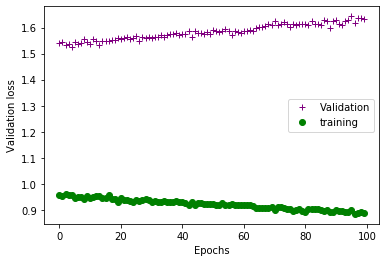

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss))
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [18]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('test_acc:', test_acc)
print("test loss: ", test_loss)

10000/10000 [==============================] - 1s 52us/sample - loss: 1.6048 - acc: 0.5664
test_acc: 0.5664
test loss:  1.6048228435516358


In [0]:
model.save_weights('cifar10_feature_extraction.h5', overwrite=True)